In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

Loading data 
using pandas

In [2]:
df=pd.read_csv("E:\\mozilla download\\bengaluru_house_prices.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [3]:
# before go further in analysis we remove the columns or cherecterstics which are not neccesery
df1=df.drop(['area_type','availability','society','balcony'],axis=1)

In [4]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [16]:
# drop the null values if they are not much effect our model
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [5]:
df1.dropna(axis=0,inplace=True)

In [20]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [21]:
df1.shape

(13246, 5)

In [22]:
df1.head(3)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00


Feature ENgineering

In [29]:
# now we check the every column indiviualy , and feature the column according to our needs

df1['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [6]:
# here we remove the bhk berdooms and uther unwanted text from our column and creaate new column of bhk

df1['bhk'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))
df1.bhk.unique()



array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [7]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [8]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [9]:
df1['total_sqft']=df1['total_sqft'].apply(convert_sqft_to_num)

In [37]:
df1['total_sqft'].value_counts()

total_sqft
1200.0    843
1100.0    221
1500.0    204
2400.0    195
600.0     180
         ... 
904.0       1
396.0       1
4273.0      1
3329.0      1
4689.0      1
Name: count, Length: 1972, dtype: int64

In [10]:
df1.drop('size',axis=1,inplace=True)

In [40]:
df1

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,Richards Town,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [41]:
df1.price.unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])


Feature Engineering

Add new feature called price per square feet


In [11]:
df1['Per_Sqr_price']=round(df1['price']/df1['total_sqft']*100000,2)

In [65]:
df1

,location,total_sqft,bath,price,bhk,Per_Sqr_price
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,51.00,2,4250.00
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.83
13316,Richards Town,3600.0,5.0,400.00,4,11111.11
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.55
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.34


In [48]:
df1.Per_Sqr_price.max()

12000000.0

In [12]:
# q_low = df1["Per_Sqr_price"].quantile(0.01)
q_hi  = df1["Per_Sqr_price"].quantile(0.990)

df2 = df1[(df1["Per_Sqr_price"] < q_hi)] #& (df1["Per_Sqr_price"] > q_low)]

In [157]:
df2.describe()

,total_sqft,bath,price,bhk,Per_Sqr_price
count,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000
mean,1547.683175,2.667355,106.063862,2.777778,6452.818666
std,1225.400570,1.268228,119.345702,1.214207,3511.707872
min,250.000000,1.000000,8.000000,1.000000,267.830000
25%,1100.000000,2.000000,50.000000,2.000000,4255.320000
50%,1272.000000,2.000000,70.000000,3.000000,5412.950000
75%,1664.000000,3.000000,118.000000,3.000000,7222.535000
max,52272.000000,27.000000,2340.000000,27.000000,23674.240000


In [158]:
df2.location.value_counts(ascending=False)

location
Whitefield                 529
Sarjapur  Road             391
Electronic City            301
Kanakpura Road             264
Thanisandra                232
                          ... 
Rahat Bagh                   1
Attiguppe                    1
Nagarbhavi  BDA Complex      1
Rajanna Layout               1
Abshot Layout                1
Name: count, Length: 1283, dtype: int64

In [13]:
df2.location=df2.location.apply(lambda x:x.strip())


C:\Users\sukhb\AppData\Local\Temp\ipykernel_16300\896501815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.location=df2.location.apply(lambda x:x.strip())


In [14]:
loaction_count=df2.location.value_counts()
len(loaction_count[loaction_count>10])

237

In [15]:
location_less_then10=loaction_count[loaction_count<=10]

In [16]:
df2['location']=df2['location'].apply(lambda x: "other" if x in location_less_then10 else x )

C:\Users\sukhb\AppData\Local\Temp\ipykernel_16300\2341984193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['location']=df2['location'].apply(lambda x: "other" if x in location_less_then10 else x )


In [17]:
def lower_chr(x):
        try:
            return x.lower()
        except:
            return x
       
            
       
        

In [18]:
df2['location']=df2['location'].apply(lower_chr)

C:\Users\sukhb\AppData\Local\Temp\ipykernel_16300\1397119259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['location']=df2['location'].apply(lower_chr)


In [164]:

len(df2.location.unique())

238

In [165]:
df2.Per_Sqr_price.describe()

count    13068.000000
mean      6452.818666
std       3511.707872
min        267.830000
25%       4255.320000
50%       5412.950000
75%       7222.535000
max      23674.240000
Name: Per_Sqr_price, dtype: float64

In [19]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.Per_Sqr_price)
        st = np.std(subdf.Per_Sqr_price)
        reduced_df = subdf[(subdf.Per_Sqr_price>(m-st)) & (subdf.Per_Sqr_price<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df3=remove_pps_outliers(df2)

In [20]:
df3.Per_Sqr_price.describe()

count    10389.000000
mean      5707.673866
std       2170.390886
min       2090.910000
25%       4285.710000
50%       5225.230000
75%       6523.860000
max      20833.330000
Name: Per_Sqr_price, dtype: float64

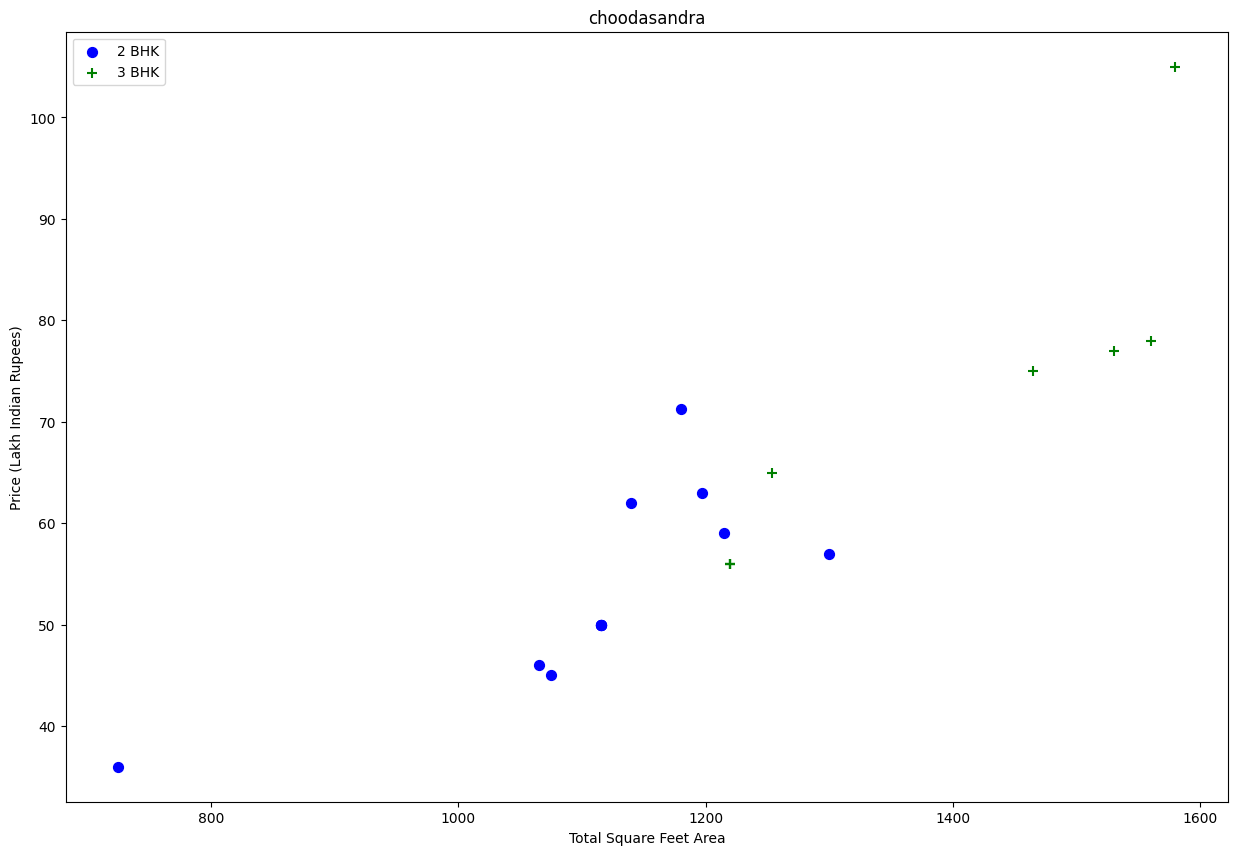

In [173]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df3,"choodasandra")

In [174]:
# df3.location.unique()

In [21]:


def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Per_Sqr_price),
                'std': np.std(bhk_df.Per_Sqr_price),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Per_Sqr_price<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df4 = remove_bhk_outliers(df3)
# df8 = df7.copy()
df4.shape



(7379, 6)

In [179]:
df4[df4.bath<df4.bhk+2]

,location,total_sqft,bath,price,bhk,Per_Sqr_price
0,1st block jayanagar,2850.0,4.0,428.00,4,15017.54
1,1st block jayanagar,1630.0,3.0,194.00,3,11901.84
2,1st block jayanagar,1200.0,6.0,125.00,6,10416.67
3,1st block jayanagar,1875.0,2.0,235.00,3,12533.33
4,1st block jayanagar,930.0,4.0,85.00,7,9139.78
...,...,...,...,...,...,...
10375,yeshwanthpur,672.0,1.0,36.85,1,5483.63
10378,yeshwanthpur,1195.0,2.0,100.00,2,8368.20
10381,yeshwanthpur,2500.0,5.0,185.00,6,7400.00
10386,yeshwanthpur,1855.0,3.0,135.00,3,7277.63


In [22]:
df5 = df4[df4.bath<df4.bhk+2]

In [202]:
df5.bath.unique()

array([ 4.,  3.,  6.,  2.,  5.,  1.,  8.,  7.,  9., 10., 16., 15., 13.])

In [180]:
df5.head()

,location,total_sqft,bath,price,bhk,Per_Sqr_price
0,1st block jayanagar,2850.0,4.0,428.0,4,15017.54
1,1st block jayanagar,1630.0,3.0,194.0,3,11901.84
2,1st block jayanagar,1200.0,6.0,125.0,6,10416.67
3,1st block jayanagar,1875.0,2.0,235.0,3,12533.33
4,1st block jayanagar,930.0,4.0,85.0,7,9139.78


In [23]:
df5.drop(['Per_Sqr_price'],axis=1,inplace=True)

C:\Users\sukhb\AppData\Local\Temp\ipykernel_16300\2325648977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.drop(['Per_Sqr_price'],axis=1,inplace=True)


In [204]:
df5

,location,total_sqft,bath,price,bhk
0,1st block jayanagar,2850.0,4.0,428.00,4
1,1st block jayanagar,1630.0,3.0,194.00,3
2,1st block jayanagar,1200.0,6.0,125.00,6
3,1st block jayanagar,1875.0,2.0,235.00,3
4,1st block jayanagar,930.0,4.0,85.00,7
...,...,...,...,...,...
10375,yeshwanthpur,672.0,1.0,36.85,1
10378,yeshwanthpur,1195.0,2.0,100.00,2
10381,yeshwanthpur,2500.0,5.0,185.00,6
10386,yeshwanthpur,1855.0,3.0,135.00,3


In [24]:
dumies=pd.get_dummies(df5.location,dtype=int)

In [25]:
df6=pd.concat([df5.drop('location',axis=1),dumies.drop('other',axis=1)],axis=1)

In [26]:
df6.rename(columns={'total_sqft':'sqft'},inplace=True)

Model 



In [27]:
X=df6.drop('price',axis=1)
y=df6.price
X.head()

,sqft,bath,bhk,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,6th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)



In [29]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8600842557849127

In [30]:
#Use K Fold cross validation to measure accuracy of our LinearRegression model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.86038236, 0.84650105, 0.85922346, 0.86517703, 0.85270277])

In [52]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.856843,{'fit_intercept': False}
1,lasso,0.716036,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.753745,"{'criterion': 'squared_error', 'splitter': 'be..."


In [38]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [44]:
# predict_price('1st phase jp nagar',1000, 2, 2)
X.head()

,sqft,bath,bhk,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,6th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
loc_index = np.where(X.columns=='vishveshwarya layout')[0][0]

print(loc_index)

231
